In [1]:
# INSTALL TORCHMETRICS
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 22.2 MB/s eta 0:00:00


In [2]:
# IMPORT
import torch
from torch.utils.data import DataLoader, random_split
from torch import optim, nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torchmetrics
from torchmetrics.segmentation import DiceScore

from tqdm import tqdm
import pandas as pd
import os
import seaborn as sns
sns.set_theme()

In [3]:
# UPLOAD .py FILES WITH MODEL, DATASET CLASS AND UTILS
# UNet_PyTorch_dataset.py, UNet_PyTorch_model.py and UNet_PyTorch_utils.py

from google.colab import files
uploaded = files.upload()

Saving UNet_PyTorch_dataset.py to UNet_PyTorch_dataset.py
Saving UNet_PyTorch_model.py to UNet_PyTorch_model.py
Saving UNet_PyTorch_utils.py to UNet_PyTorch_utils.py


In [4]:
# IMPORT
from UNet_PyTorch_dataset import MyDataset
from UNet_PyTorch_model import UNet
from UNet_PyTorch_utils import val_image_mask, train_loss_iou_dice_acc_graph

In [5]:
# CONNECT TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# LIST DIRECTORY
! ls

drive	     sample_data	      UNet_PyTorch_model.py
__pycache__  UNet_PyTorch_dataset.py  UNet_PyTorch_utils.py


In [9]:
# SET VARIABLES
ROOT_PATH_DATASET = "/content/drive/MyDrive/carvana_dataset" # Path to main dataset folder
TRANSFORM = "transform" # OR "transform_augmentation", but make sure it works on dataset!!
LIMIT = 200 # The nr of images included from dataset, to include all set value to None
BATCH_SIZE = 4
EPOCHS = 100
INPUT_CHANNELS = 3 # Number of channels in input images
NUM_CLASSES = 1 # For this inplementation the number of classes should be 1
LEARNING_RATE = 0.001 # For AdamW optimizer learning rate (LR), PyTorch default 0.001
WEIGHT_DECAY = 0.01 # For AdamW optimizer, PyTorch default 0.01
LR_S_STEP_SIZE = 30 # For LR scheduler StepLR, nr of epochs before applying gamma decay
LR_S_GAMMA = 0.1 # For LR scheduler StepLR (LR * gamma = new LR), PyTorch default 0.1
PROBABILITY = 0.5 # Threshold for binary class prediction
DICE_INCLUDE_BACKGROUND = True # TorchMetrics dice score calculation, default True
ROOT_PATH_SAVE = "/content/drive/MyDrive" # OR "/content", path where results folder will be created
CHECKPOINT_PATH = None # Path to checkpoint file with saved model, optimizer and scheduler parameters


# SET DEVICE, RUN ON CUDA IF AVAILABLE
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print("\n")
print("#" * 50)
print(f"Running on {device}")
print("#" * 50)
print("\n")


# LOAD DATASET
ROOT_PATH_DATASET = ROOT_PATH_DATASET
TRANSFORM = TRANSFORM
LIMIT = LIMIT
dataset = MyDataset(root_path=ROOT_PATH_DATASET, transform=TRANSFORM, limit=LIMIT)
generator = torch.Generator().manual_seed(25)

train_dataset, val_dataset = random_split(dataset, [0.8, 0.2], generator=generator)


LEARNING_RATE = LEARNING_RATE
BATCH_SIZE = BATCH_SIZE

train_dataloader = DataLoader(dataset=train_dataset,
                              pin_memory=False,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset,
                              pin_memory=False,
                              batch_size=BATCH_SIZE,
                              shuffle=True)


# SET MODEL COST FUNCTION, OPTIMIZER AND LEARNING RATE SCHEDULER
INPUT_CHANNELS = INPUT_CHANNELS
NUM_CLASSES = NUM_CLASSES

model = UNet(input_channels=INPUT_CHANNELS, num_classes=NUM_CLASSES).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
scheduler = lr_scheduler.StepLR(optimizer, step_size=LR_S_STEP_SIZE, gamma=LR_S_GAMMA)

if CHECKPOINT_PATH != None:
  checkpoint = torch.load(CHECKPOINT_PATH)
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  scheduler.load_state_dict(checkpoint['scheduler_state_dict'])

model_name = model.__class__.__name__
optimizer_name = optimizer.__class__.__name__
criterion_name = criterion.__class__.__name__
scheduler_name = scheduler.__class__.__name__



##################################################
Running on cuda
##################################################




EPOCHS:   0%|          | 0/10 [00:00<?, ?it/s]

--------------------------------------------------
Beginning of epoch 1
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]


End of training part of epoch 1
-----


BATCH VAL: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


End of validation part of epoch 1
--------------------------------------------------
End of epoch 1
--------------------------------------------------
Training Loss EPOCH 1: 0.3901
Training IoU EPOCH 1: 0.6992
--------------------------------------------------
Validation Loss EPOCH 1: 0.5359
Validation IoU EPOCH 1: 0.0000
--------------------------------------------------


EPOCHS:  10%|█         | 1/10 [00:17<02:33, 17.11s/it]

--------------------------------------------------
Beginning of epoch 2
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]


End of training part of epoch 2
-----


BATCH VAL: 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]


End of validation part of epoch 2
--------------------------------------------------
End of epoch 2
--------------------------------------------------
Training Loss EPOCH 2: 0.2223
Training IoU EPOCH 2: 0.8755
--------------------------------------------------
Validation Loss EPOCH 2: 0.2611
Validation IoU EPOCH 2: 0.7004
--------------------------------------------------


EPOCHS:  20%|██        | 2/10 [00:22<01:20, 10.10s/it]

--------------------------------------------------
Beginning of epoch 3
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s]


End of training part of epoch 3
-----


BATCH VAL: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]


End of validation part of epoch 3
--------------------------------------------------
End of epoch 3
--------------------------------------------------
Training Loss EPOCH 3: 0.1586
Training IoU EPOCH 3: 0.9116
--------------------------------------------------
Validation Loss EPOCH 3: 0.1569
Validation IoU EPOCH 3: 0.8869
--------------------------------------------------


EPOCHS:  30%|███       | 3/10 [00:27<00:55,  7.99s/it]

--------------------------------------------------
Beginning of epoch 4
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]


End of training part of epoch 4
-----


BATCH VAL: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]


End of validation part of epoch 4
--------------------------------------------------
End of epoch 4
--------------------------------------------------
Training Loss EPOCH 4: 0.1281
Training IoU EPOCH 4: 0.9118
--------------------------------------------------
Validation Loss EPOCH 4: 0.1227
Validation IoU EPOCH 4: 0.9171
--------------------------------------------------


EPOCHS:  40%|████      | 4/10 [00:34<00:43,  7.30s/it]

--------------------------------------------------
Beginning of epoch 5
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]


End of training part of epoch 5
-----


BATCH VAL: 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]


End of validation part of epoch 5
--------------------------------------------------
End of epoch 5
--------------------------------------------------
Training Loss EPOCH 5: 0.1014
Training IoU EPOCH 5: 0.9209
--------------------------------------------------
Validation Loss EPOCH 5: 0.0879
Validation IoU EPOCH 5: 0.9368
--------------------------------------------------


EPOCHS:  50%|█████     | 5/10 [00:39<00:33,  6.68s/it]

--------------------------------------------------
Beginning of epoch 6
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]


End of training part of epoch 6
-----


BATCH VAL: 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]


End of validation part of epoch 6
--------------------------------------------------
End of epoch 6
--------------------------------------------------
Training Loss EPOCH 6: 0.0819
Training IoU EPOCH 6: 0.9345
--------------------------------------------------
Validation Loss EPOCH 6: 0.0911
Validation IoU EPOCH 6: 0.9343
--------------------------------------------------


EPOCHS:  60%|██████    | 6/10 [00:45<00:26,  6.54s/it]

--------------------------------------------------
Beginning of epoch 7
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.08it/s]


End of training part of epoch 7
-----


BATCH VAL: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]


End of validation part of epoch 7
--------------------------------------------------
End of epoch 7
--------------------------------------------------
Training Loss EPOCH 7: 0.0734
Training IoU EPOCH 7: 0.9283
--------------------------------------------------
Validation Loss EPOCH 7: 2.0848
Validation IoU EPOCH 7: 0.3554
--------------------------------------------------


EPOCHS:  70%|███████   | 7/10 [00:52<00:19,  6.47s/it]

--------------------------------------------------
Beginning of epoch 8
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]


End of training part of epoch 8
-----


BATCH VAL: 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]


End of validation part of epoch 8
--------------------------------------------------
End of epoch 8
--------------------------------------------------
Training Loss EPOCH 8: 0.0662
Training IoU EPOCH 8: 0.9270
--------------------------------------------------
Validation Loss EPOCH 8: 0.1378
Validation IoU EPOCH 8: 0.8567
--------------------------------------------------


EPOCHS:  80%|████████  | 8/10 [00:58<00:12,  6.35s/it]

--------------------------------------------------
Beginning of epoch 9
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:03<00:00,  4.14it/s]


End of training part of epoch 9
-----


BATCH VAL: 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]


End of validation part of epoch 9
--------------------------------------------------
End of epoch 9
--------------------------------------------------
Training Loss EPOCH 9: 0.0550
Training IoU EPOCH 9: 0.9418
--------------------------------------------------
Validation Loss EPOCH 9: 0.0880
Validation IoU EPOCH 9: 0.9049
--------------------------------------------------


EPOCHS:  90%|█████████ | 9/10 [01:04<00:06,  6.33s/it]

--------------------------------------------------
Beginning of epoch 10
--------------------------------------------------


BATCH TRAIN: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]


End of training part of epoch 10
-----


BATCH VAL: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]


End of validation part of epoch 10
--------------------------------------------------
End of epoch 10
--------------------------------------------------
Training Loss EPOCH 10: 0.0477
Training IoU EPOCH 10: 0.9468
--------------------------------------------------
Validation Loss EPOCH 10: 0.0462
Validation IoU EPOCH 10: 0.9632
--------------------------------------------------


EPOCHS: 100%|██████████| 10/10 [01:11<00:00,  7.12s/it]


-----
   Epoch  Train loss  Val loss  Train IoU   Val IoU  Train dice  Val dice  \
0      1    0.390074  0.535881   0.699243  0.000000    0.808624  0.000000   
1      2    0.222345  0.261096   0.875524  0.700377    0.933231  0.813435   
2      3    0.158596  0.156865   0.911632  0.886861    0.953462  0.940026   
3      4    0.128061  0.122656   0.911847  0.917146    0.953620  0.956742   
4      5    0.101426  0.087892   0.920932  0.936824    0.958449  0.967380   
5      6    0.081923  0.091113   0.934549  0.934276    0.965973  0.966018   
6      7    0.073366  2.084770   0.928321  0.355420    0.962679  0.523526   
7      8    0.066232  0.137811   0.927011  0.856700    0.961948  0.922807   
8      9    0.055024  0.088034   0.941770  0.904911    0.969807  0.950042   
9     10    0.047726  0.046189   0.946785  0.963221    0.972557  0.981265   

   Train acc   Val acc Updated LR  
0   0.890018  0.767755    [0.001]  
1   0.970075  0.934855    [0.001]  
2   0.979604  0.973157    [0.001]  
3 

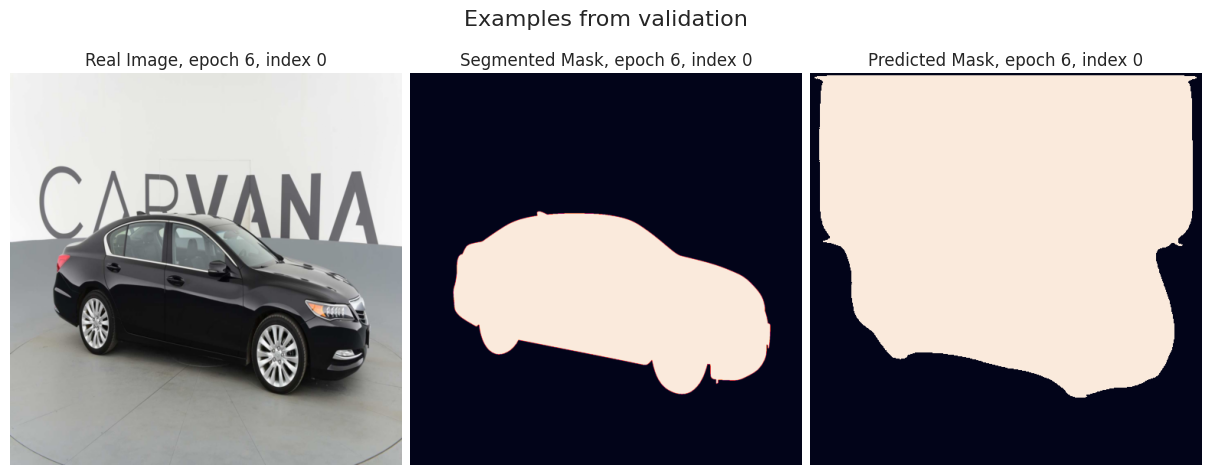

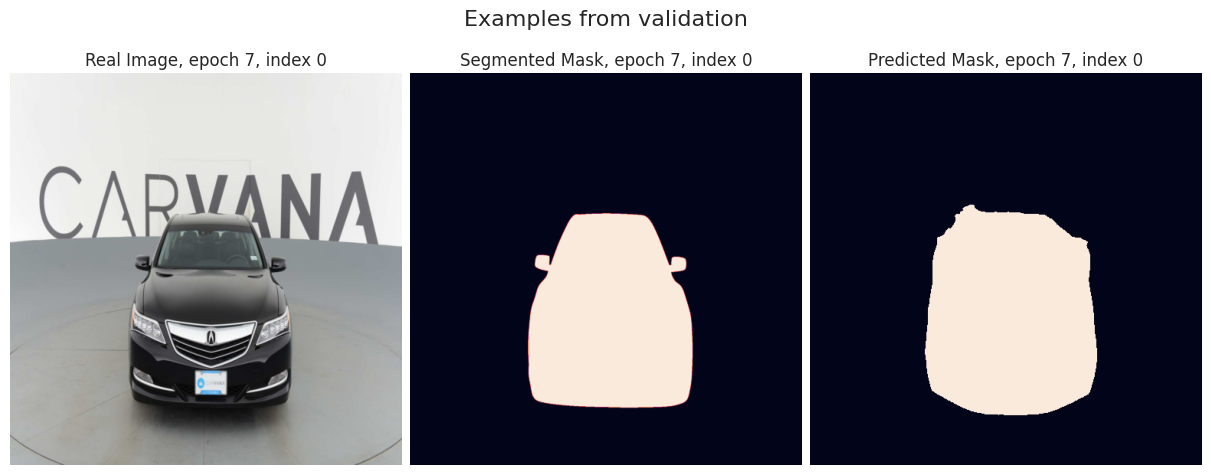

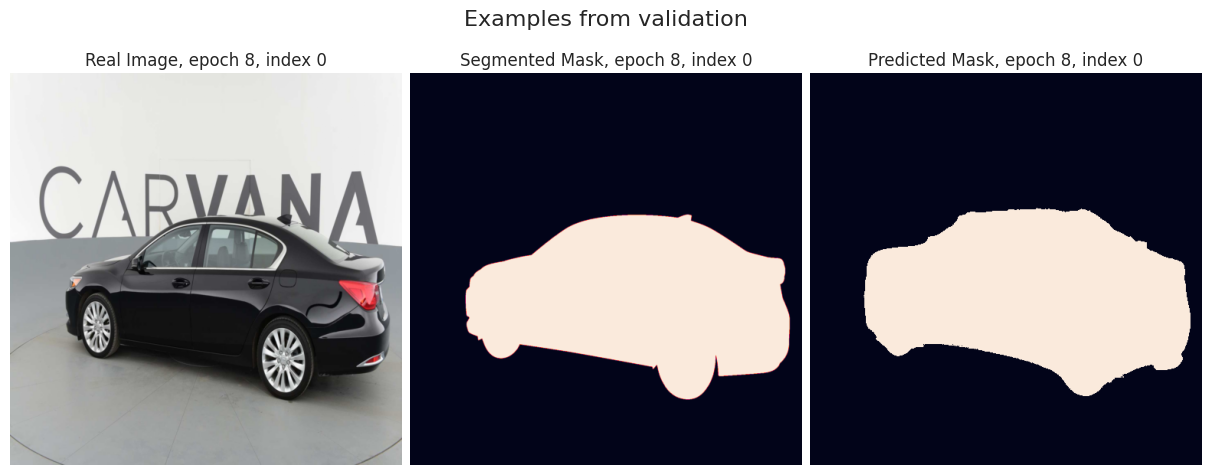

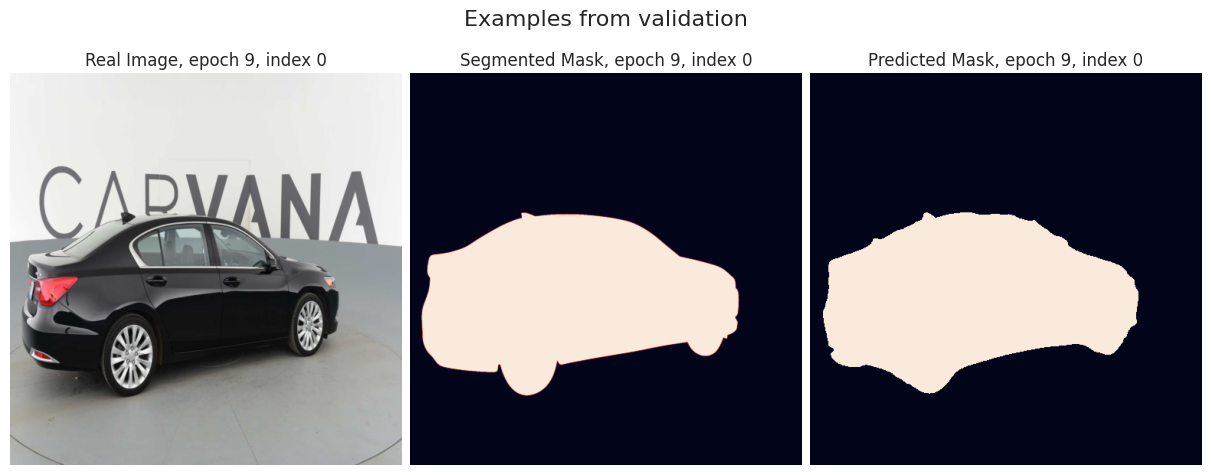

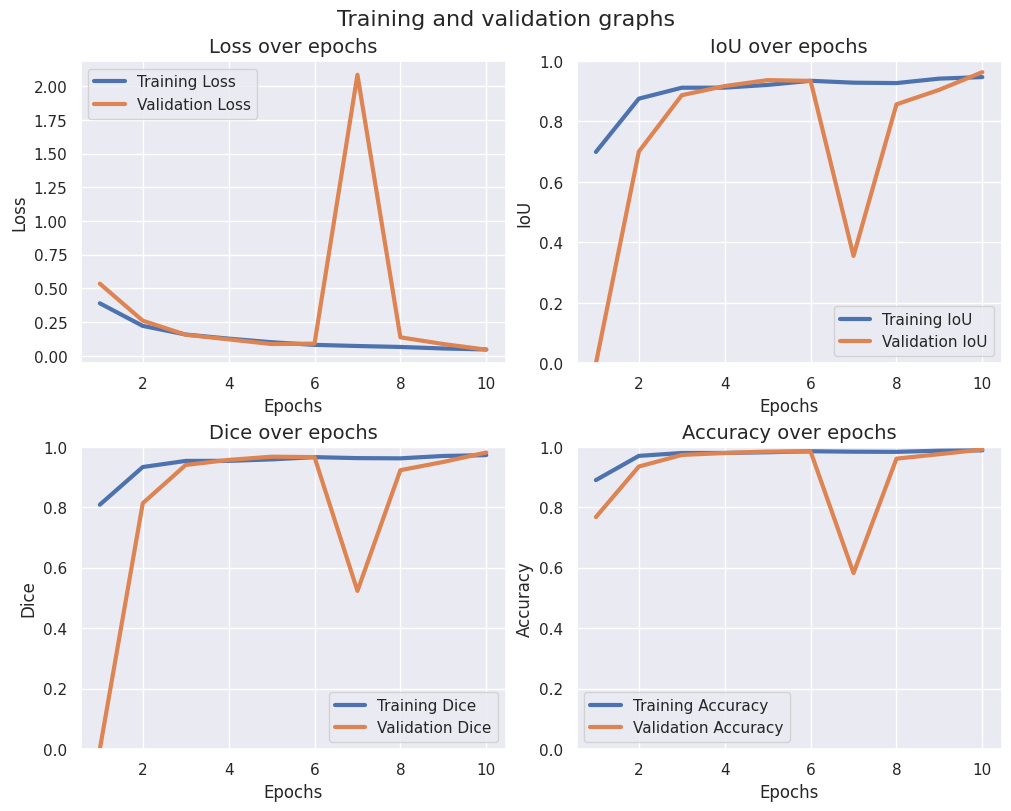

In [10]:
# SAVE RESULTS
ROOT_PATH_SAVE = ROOT_PATH_SAVE
save_directory = "UNet_training_results"
save_path = os.path.join(ROOT_PATH_SAVE, save_directory)

if not os.path.exists(save_path):
    os.mkdir(save_path)
else:
    x = 1
    while os.path.exists(save_path):
        new_save_directory = (f"{save_directory}_{x + 1}")
        save_path = os.path.join(ROOT_PATH_SAVE, new_save_directory)
        x += 1
    os.mkdir(save_path)


# TRAIN AND EVALUATE
EPOCHS = EPOCHS
train_losses = []
train_dices = []
train_ious = []
train_dices = []
train_accs = []
val_losses = []
val_ious = []
val_dices = []
val_accs = []
lr_updates = []

for epoch in tqdm(range(EPOCHS), "EPOCHS"):
    model.train()
    train_loss_sum = 0
    train_iou_sum = 0
    train_dice_sum = 0
    train_acc_sum = 0
    nr_of_train_loss_items = 0

    jaccardindex = torchmetrics.JaccardIndex(task='binary').to(device)
    dice_segmentation = DiceScore(num_classes=1, include_background=DICE_INCLUDE_BACKGROUND).to(device)
    accuracy = torchmetrics.Accuracy(task='binary').to(device)

    print("-" * 50)
    print(f"Beginning of epoch {epoch + 1}")
    print("-" * 50)

    for idx, img_mask in enumerate(tqdm(train_dataloader, "BATCH TRAIN", position=0, leave=True)):
        img = img_mask[0].float().to(device)
        mask = img_mask[1].float().to(device)

        mask_pred = model(img)
        optimizer.zero_grad()

        loss = criterion(mask_pred, mask)

        prediction = torch.sigmoid(mask_pred)
        prediction[prediction < PROBABILITY] = 0
        prediction[prediction >= PROBABILITY] = 1

        prediction_int = prediction.long()
        mask_int = mask.long()

        iou = jaccardindex(prediction_int, mask_int)
        dice = dice_segmentation(prediction_int, mask_int)
        acc = accuracy(prediction_int, mask_int)

        train_loss_sum += loss.item()
        train_iou_sum += iou.item()
        train_dice_sum += dice.item()
        train_acc_sum += acc.item()
        nr_of_train_loss_items += 1

        loss.backward()
        optimizer.step()

    scheduler.step()
    updated_lr = scheduler.get_last_lr()
    lr_updates.append(updated_lr)

    train_loss = train_loss_sum / len(train_dataloader)
    train_iou = train_iou_sum / len(train_dataloader)
    train_dice = train_dice_sum / len(train_dataloader)
    train_acc = train_acc_sum / len(train_dataloader)

    train_losses.append(train_loss)
    train_ious.append(train_iou)
    train_dices.append(train_dice)
    train_accs.append(train_acc)

    print(f"End of training part of epoch {epoch + 1}")
    print("-" * 5)


    model.eval()
    val_loss_sum = 0
    val_iou_sum = 0
    val_dice_sum = 0
    val_acc_sum = 0
    nr_of_val_loss_items = 0
    with torch.no_grad():
        for idx, img_mask in enumerate(tqdm(val_dataloader, "BATCH VAL", position=0, leave=True)):
            img = img_mask[0].float().to(device)
            mask = img_mask[1].float().to(device)

            mask_pred = model(img)
            loss = criterion(mask_pred, mask)

            prediction = torch.sigmoid(mask_pred)
            prediction[prediction < PROBABILITY] = 0
            prediction[prediction >= PROBABILITY] = 1

            prediction_int = prediction.long()
            mask_int = mask.long()

            iou = jaccardindex(prediction_int, mask_int)
            dice = dice_segmentation(prediction_int, mask_int)
            acc = accuracy(prediction_int, mask_int)

            val_loss_sum += loss.item()
            val_iou_sum += iou.item()
            val_dice_sum += dice.item()
            val_acc_sum += acc.item()
            nr_of_val_loss_items += 1

            # SAVE IMAGES FOR SOME OF THE PREDICTIONS
            if idx == 0 and epoch > EPOCHS - 5:
                val_image_mask(save_path, epoch, idx, img, mask, prediction)

        val_loss = val_loss_sum / len(val_dataloader)
        val_iou = val_iou_sum / len(val_dataloader)
        val_dice = val_dice_sum / len(val_dataloader)
        val_acc = val_acc_sum / len(val_dataloader)

        val_losses.append(val_loss)
        val_ious.append(val_iou)
        val_dices.append(val_dice)
        val_accs.append(val_acc)

        print(f"End of validation part of epoch {epoch + 1}")


    print("-" * 50)
    print(f"End of epoch {epoch + 1}")
    print("-" * 50)
    print(f"Training Loss EPOCH {epoch + 1}: {train_loss:.4f}")
    print(f"Training IoU EPOCH {epoch + 1}: {train_iou:.4f}")
    print("-" * 50)
    print(f"Validation Loss EPOCH {epoch + 1}: {val_loss:.4f}")
    print(f"Validation IoU EPOCH {epoch + 1}: {val_iou:.4f}")
    print("-" * 50)


    checkpoint = {'epoch': epoch,
                  'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'scheduler_state_dict': scheduler.state_dict()}
    torch.save(checkpoint, (os.path.join(save_path, f"checkpoint_{epoch + 1}.pth")))


# PANDAS DATAFRAME WITH TRAINING RESULTS
epochs_list = list(range(1, EPOCHS + 1))
lists = [epochs_list, train_losses, val_losses, train_ious, val_ious,
         train_dices, val_dices, train_accs, val_accs, lr_updates]
titles = ["Epoch", "Train loss", "Val loss", "Train IoU", "Val IoU",
          "Train dice", "Val dice", "Train acc", "Val acc", "Updated LR"]
training_results_dictionary = {"Epoch": epochs_list, "Train loss": train_losses,
                               "Val loss": val_losses, "Train IoU": train_ious,
                               "Val IoU": val_ious, "Train dice": train_dices,
                               "Val dice": val_dices, "Train acc": train_accs,
                               "Val acc": val_accs, "Updated LR": lr_updates}
df = pd.DataFrame(training_results_dictionary)
df.to_csv((os.path.join(save_path, "training_dataframe.csv")), index=False)
print("-" * 5)
print(df)
print("-" * 50)


# PANDAS DATAFRAME WITH GENERAL INFO
info_names = ["Model", "Criterion", "Optimizer", "Weight decay", "LR scheduler", "LR start", "LR step size",
              "LR gamma", "Input channels", "Number of classes", "Length dataset", "Training images",
              "Validation images", "Limit", "Batch size", "Epochs", "Probability", "Dice include background"]
info_items = [model_name, criterion_name, optimizer_name, WEIGHT_DECAY, scheduler_name, LEARNING_RATE,
              LR_S_STEP_SIZE, LR_S_GAMMA, INPUT_CHANNELS, NUM_CLASSES, len(dataset), len(train_dataset),
              len(val_dataset), LIMIT, BATCH_SIZE, EPOCHS, PROBABILITY, DICE_INCLUDE_BACKGROUND]

info_dict = {"Item": info_names, "Info": info_items}
info_df = pd.DataFrame(info_dict)
info_df.to_csv((os.path.join(save_path, "training_info.csv")), index=False)


# GRAPH SHOWING TRAINING AND VALIDATION LOSS AND DICE
loss_iou_dice_acc_graph = train_loss_iou_dice_acc_graph(save_path, epochs_list, train_losses, val_losses,
                                  train_ious, val_ious, train_dices, val_dices, train_accs, val_accs)


torch.cuda.empty_cache()